In [17]:
import ast
import pandas as pd
import sys
import matplotlib.pylab as plt
import operator
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pyfpgrowth
import timeit

In [18]:
uid_songid_file_location = './Dataset/Result_by_userid_count_multiple_songs.csv'
songid_mappings_file_location = './Dataset/kaggle_songs.txt'

In [19]:
uid_songid_file = open(uid_songid_file_location)
uid_songid_file_data = []
for line in uid_songid_file:
    to_be_appended = line.strip().replace('[','').replace(']','').replace('"','').replace("'",'').strip().replace(' ','').split(',')
    uid_songid_file_data.append(to_be_appended[1:])
uid_songid_file_data = uid_songid_file_data[1:]
uid_songid_file.close()

In [20]:
songid_mappings_file = open(songid_mappings_file_location)
songid_mappings = {}
for line in songid_mappings_file:
    temp_var = line.strip().split()
    songid_mappings[temp_var[0]] = int(temp_var[1])

songid_mappings_file.close()
#songid_mappings

In [21]:
#In transactional type data, convert hashed song_id to its corresponding numerical song_id 

for itemset in uid_songid_file_data:
    for item_num in range(len(itemset)):
        if(type(itemset[item_num]) == str):
            itemset[item_num] = itemset[item_num].strip()
            itemset[item_num] = songid_mappings[itemset[item_num]]   
    itemset.sort()

In [22]:
#Modify the data to reflect if a song is preferred with high, medium or low frequency by a user. 
#NOTE: Call this only once. Calling it again and again can append L/M/H again and again and we don't want that.

for user_num in range(len(uid_songid_file_data)):
    itemset = uid_songid_file_data[user_num]
    sid_dict = {}
    new_itemset = []
    for item in itemset:
        if(item in sid_dict):
            sid_dict[item] += 1
        else:
            sid_dict[item] = 1
    for sid,frequency in sid_dict.items():
        new_sid = str(sid)
        if(frequency<5):
            new_sid += 'L'
        if(frequency>=5 and frequency<10):
            new_sid += 'M'
        if(frequency>=10):
            new_sid +='H'
        new_itemset.append(new_sid)
        
    uid_songid_file_data[user_num] = new_itemset

uid_songid_file_data[3]

['41446L',
 '83123L',
 '85724L',
 '115697H',
 '126580L',
 '141927L',
 '168365L',
 '228083L',
 '289108L',
 '297161L',
 '375283L']

In [23]:
uid_songid_transaction_data = uid_songid_file_data
#len(uid_songid_transaction_data)

In [26]:
patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, 20)
len(patterns)

20337

In [27]:
sorted_patterns = sorted(patterns.items(), key=operator.itemgetter(1),reverse=True)
for i in sorted_patterns:
    print(i)
#sorted_x[1:1000]

(('91177L',), 3867)
(('14397L',), 2962)
(('12985L', '25150L'), 549)
(('14397L', '217471L'), 519)
(('217471L', '91177L'), 513)
(('14397L', '91177L'), 485)
(('12985L', '288653L'), 480)
(('25150L', '288653L'), 445)
(('177172L', '54386L'), 400)
(('51070L',), 387)
(('212753L',), 386)
(('177172L', '91177L'), 386)
(('385556L',), 385)
(('217471L', '54386L'), 383)
(('54386L', '91177L'), 376)
(('134909L',), 371)
(('326792L',), 368)
(('374516L',), 360)
(('12985L', '68212L'), 347)
(('25150L', '68212L'), 345)
(('55106L',), 332)
(('302247L', '54386L'), 330)
(('7612L',), 323)
(('164696L',), 322)
(('10208L',), 320)
(('314086L', '54386L'), 313)
(('171320L',), 307)
(('217471L', '302247L'), 305)
(('309958L',), 298)
(('123769L',), 294)
(('314086L', '91177L'), 293)
(('73317L',), 287)
(('292369L',), 286)
(('211200L',), 286)
(('212675L',), 286)
(('186927L',), 286)
(('359613L',), 285)
(('172688L',), 278)
(('103524L',), 278)
(('12985L', '87433L'), 277)
(('139370L',), 275)
(('207108L',), 274)
(('225153L',), 274

(('173237L',), 57)
(('173984L',), 57)
(('163762L',), 57)
(('332333L',), 57)
(('252048L',), 57)
(('322742L',), 57)
(('305804L', '359476L'), 57)
(('293778L', '353035L'), 57)
(('302369L', '315546L'), 57)
(('217471M', '314086L'), 57)
(('177574L', '68212L'), 57)
(('307414L', '91177L'), 57)
(('122591L', '126831L'), 57)
(('105434L', '345265L'), 57)
(('305991L', '68212L'), 57)
(('12985L', '289238L'), 57)
(('25150L', '351764L'), 57)
(('14397L', '154559L'), 57)
(('315812L', '362714L'), 57)
(('217471L', '245012L'), 57)
(('24825L', '97972L'), 57)
(('25323L', '311262L'), 57)
(('302247L', '91177M'), 57)
(('307140L', '353700L'), 57)
(('292298L', '314086L'), 57)
(('333259L', '383719L'), 57)
(('142745L', '165401L'), 57)
(('12985L', '2078L'), 57)
(('2078L', '302247L'), 57)
(('177172L', '25150H'), 57)
(('207935L', '54386L'), 57)
(('14397L', '207935L'), 57)
(('310418L', '333259L'), 57)
(('12985L', '289658L'), 57)
(('242151L', '302247L'), 57)
(('105434L', '245936L'), 57)
(('25150L', '307202L', '68212L'), 5

(('323278L',), 40)
(('367872L',), 40)
(('116052L',), 40)
(('69479L',), 40)
(('39874L',), 40)
(('373333L',), 40)
(('15868L',), 40)
(('117820L',), 40)
(('51348L',), 40)
(('52875L',), 40)
(('241780L',), 40)
(('336109L',), 40)
(('376000L',), 40)
(('240534L',), 40)
(('98029L',), 40)
(('86427L',), 40)
(('983L',), 40)
(('364236L',), 40)
(('223881L',), 40)
(('308767L',), 40)
(('67124L',), 40)
(('262741L',), 40)
(('221908L',), 40)
(('357373L',), 40)
(('101574L',), 40)
(('256499M',), 40)
(('341629L',), 40)
(('143361L',), 40)
(('145952L', '94064L'), 40)
(('319788L', '42474L'), 40)
(('50871L', '70550L'), 40)
(('165401L', '263887L'), 40)
(('170541L', '266750H'), 40)
(('288347L', '290375L'), 40)
(('142093L', '374972L'), 40)
(('142093L', '290375L'), 40)
(('145952L', '295919L'), 40)
(('307414L', '60252L'), 40)
(('57500L', '60252L'), 40)
(('109807L', '60252L'), 40)
(('290375L', '374972L'), 40)
(('186533L', '364125L'), 40)
(('116185L', '251150L'), 40)
(('186533L', '57500L'), 40)
(('186533L', '91177L'), 

(('213945L',), 31)
(('12232L',), 31)
(('68100L',), 31)
(('77653L',), 31)
(('6167L',), 31)
(('192814L',), 31)
(('369888L',), 31)
(('88342L',), 31)
(('120011L',), 31)
(('22787L',), 31)
(('23525L',), 31)
(('225221H',), 31)
(('106112L',), 31)
(('367169L',), 31)
(('362652H',), 31)
(('217342L',), 31)
(('302476L',), 31)
(('316486L',), 31)
(('89894L',), 31)
(('362413L',), 31)
(('329050L',), 31)
(('367372L',), 31)
(('266830L',), 31)
(('174506L',), 31)
(('317835L',), 31)
(('208892L',), 31)
(('277261L',), 31)
(('354246L',), 31)
(('266909L',), 31)
(('39029L',), 31)
(('62865L',), 31)
(('277957L',), 31)
(('16116H',), 31)
(('178216L',), 31)
(('337760M',), 31)
(('48928L',), 31)
(('112750M',), 31)
(('265754L',), 31)
(('210452L',), 31)
(('367479L',), 31)
(('359915L',), 31)
(('99940L',), 31)
(('49469H',), 31)
(('156018L',), 31)
(('303035L',), 31)
(('253530L',), 31)
(('151196L',), 31)
(('81337L',), 31)
(('159775L',), 31)
(('155939L',), 31)
(('27709L',), 31)
(('282317L',), 31)
(('354593M',), 31)
(('63299L'

(('8358H',), 25)
(('163056L',), 25)
(('348601L',), 25)
(('111095L',), 25)
(('184803L',), 25)
(('318169H',), 25)
(('32260M',), 25)
(('216741L',), 25)
(('146663L',), 25)
(('156063L',), 25)
(('147150L',), 25)
(('208194L',), 25)
(('46447L',), 25)
(('286566L',), 25)
(('379252L',), 25)
(('289933L',), 25)
(('48070L',), 25)
(('100092L',), 25)
(('384489L',), 25)
(('66262L',), 25)
(('305998L',), 25)
(('217379L',), 25)
(('369018L',), 25)
(('289842L',), 25)
(('174190L',), 25)
(('194103L',), 25)
(('218095L',), 25)
(('106452L',), 25)
(('155424H',), 25)
(('41108L',), 25)
(('360407L',), 25)
(('258506L',), 25)
(('302801L',), 25)
(('326959L',), 25)
(('294930L',), 25)
(('277434L',), 25)
(('141957L',), 25)
(('161654L',), 25)
(('271479L',), 25)
(('8358L',), 25)
(('113758L',), 25)
(('196087M',), 25)
(('128193L',), 25)
(('315910L',), 25)
(('239281L',), 25)
(('31614L',), 25)
(('137536L',), 25)
(('26565L',), 25)
(('39287L',), 25)
(('65579L',), 25)
(('113256L',), 25)
(('29838L',), 25)
(('95786L',), 25)
(('27579

(('154151L', '54386L'), 22)
(('154151L', '91177L'), 22)
(('105434L', '50740L'), 22)
(('39401L', '54386L'), 22)
(('130077L', '314086L'), 22)
(('130077L', '165401L'), 22)
(('168430L', '285387L', '302369L'), 22)
(('314086L', '84395L'), 22)
(('30292L', '310418L'), 22)
(('302369L', '362643L'), 22)
(('147248L', '25323L'), 22)
(('14397L', '147248L'), 22)
(('14397L', '16174L'), 22)
(('16174L', '91177L'), 22)
(('282116L', '288653L'), 22)
(('297177L', '52176L'), 22)
(('2242L', '291341L'), 22)
(('127365L', '333259L'), 22)
(('127365L', '86545L'), 22)
(('30643L', '348629L'), 22)
(('217471L', '231280L'), 22)
(('245012L', '93787L'), 22)
(('142602L', '195955L'), 22)
(('217471L', '309672L'), 22)
(('129495L', '138672L'), 22)
(('129495L', '52176L'), 22)
(('129495L', '314086L'), 22)
(('129495L', '212017L'), 22)
(('129495L', '307140L'), 22)
(('123630L', '192425L'), 22)
(('242151L', '253868L'), 22)
(('253868L', '54386L'), 22)
(('292298L', '68212H'), 22)
(('202995L', '302247L'), 22)
(('202995L', '211334L'), 

(('241705L', '307140L', '91177L'), 20)
(('14397L', '241705L', '307140L'), 20)
(('302247L', '307140L', '314086L'), 20)
(('307140L', '45592L', '91177L'), 20)
(('14397L', '307140L', '45592L'), 20)
(('302247L', '307140L', '333259L'), 20)
(('24825L', '307140L', '315812L'), 20)
(('217471L', '289658L', '91177L'), 20)
(('242151L', '243769L', '91177L'), 20)
(('14397L', '241705L', '242151L'), 20)
(('105434L', '319911L'), 20)
(('105434L', '183796L', '86545L'), 20)
(('105434L', '241705L', '52478L'), 20)
(('105434L', '314086L', '38941L'), 20)
(('105434L', '14397L', '38941L'), 20)
(('105434L', '14397L', '170541L'), 20)
(('105434L', '170541L', '177172L'), 20)
(('105434L', '170541L', '243769L'), 20)
(('105434L', '302369L', '45592L'), 20)
(('105434L', '243769L', '302369L'), 20)
(('105434L', '177172L', '302369L'), 20)
(('105434L', '177172L', '86545L'), 20)
(('105434L', '217471L', '243769L'), 20)
(('105434L', '14397L', '54386L'), 20)
(('183796L', '307202L'), 20)
(('307202L', '38941L'), 20)
(('307202L', '

In [30]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.5)
len(rules)
rules

{('222348L', '31260L'): (('202559L',), 0.5555555555555556),
 ('161020L', '46477L'): (('296731L',), 0.5128205128205128),
 ('174148L', '258100L'): (('5802L',), 0.5121951219512195),
 ('174148L', '5802L'): (('258100L',), 0.5384615384615384),
 ('232635L', '83123L'): (('107825L',), 0.5121951219512195),
 ('192716L', '307202L'): (('68212L',), 0.5),
 ('242151L', '86545L'): (('334240L',), 0.5121951219512195),
 ('170541L', '302369L', '314086L'): (('333259L',), 0.5384615384615384),
 ('170541L', '302369L', '333259L'): (('314086L',), 0.5384615384615384),
 ('302369L', '314086L', '333259L'): (('170541L',), 0.5384615384615384),
 ('288653L', '319911L', '68212L'): (('12985L',), 0.5),
 ('244143L', '25150L', '68212L'): (('12985L',), 0.5833333333333334),
 ('14397L', '241705L', '24825L'): (('217471L',), 0.6176470588235294),
 ('165401L', '52478L', '91177L'): (('315812L',), 0.5128205128205128),
 ('165401L', '177172L', '52478L'): (('315812L',), 0.5),
 ('165401L', '302247L', '52478L'): (('315812L',), 0.523809523

In [31]:
#Run FP for various different Min Sup values

MAX_NUM = 8
MIN_CONF = 0.5
min_sup_array = [5*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
num_itemsets_array = []
time_taken_array = []
num_association_rules_array = []
for i in range(len(min_sup_array)):
    start = timeit.default_timer()
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, min_sup_array[i])
    num_itemsets_array.append(len(patterns))
    stop = timeit.default_timer()
    time_taken_array.append(stop-start)
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF)
    num_association_rules_array.append(len(rules))


In [32]:
num_itemsets_array

[180847, 55284, 20337, 7489, 2481, 735, 235, 89]

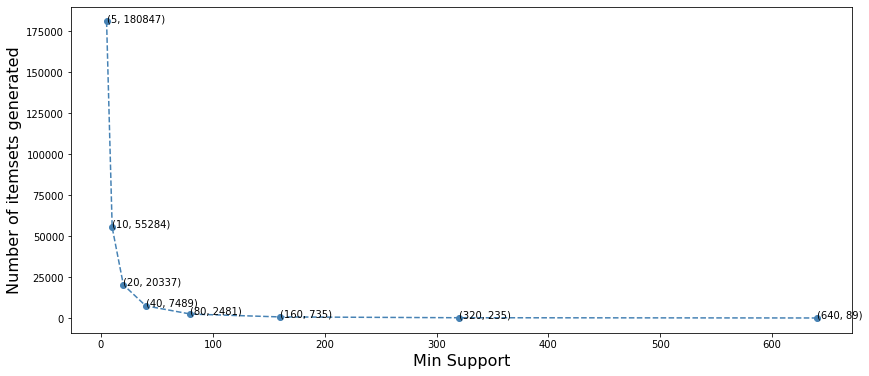

In [33]:
#Plot number of itemsets with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_itemsets_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of itemsets generated", fontsize=16)
for i in range(0,len(num_itemsets_array)):
    plt.text(min_sup_array[i], num_itemsets_array[i],'({}, {})'.format(min_sup_array[i], num_itemsets_array[i]))
plt.show()

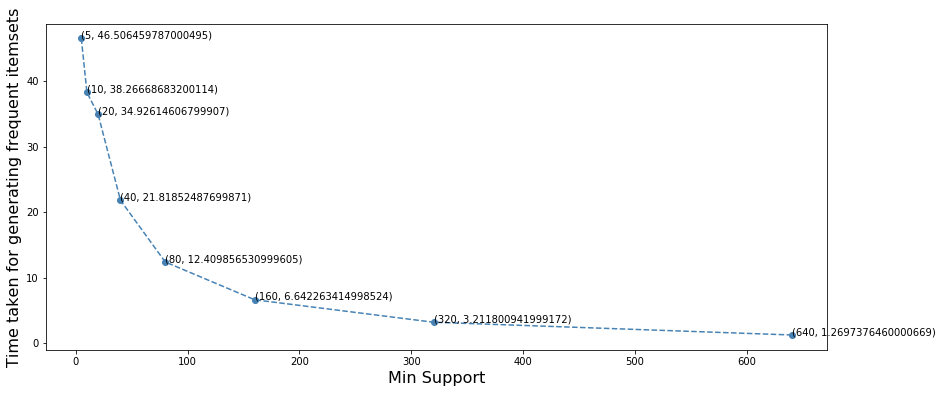

In [34]:
#Plot time taken to find frequent itemsets with respect to MIN_SUP

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Time taken for generating frequent itemsets", fontsize=16)
for i in range(0,len(time_taken_array)):
    plt.text(min_sup_array[i], time_taken_array[i],'({}, {})'.format(min_sup_array[i], time_taken_array[i]))
plt.show()

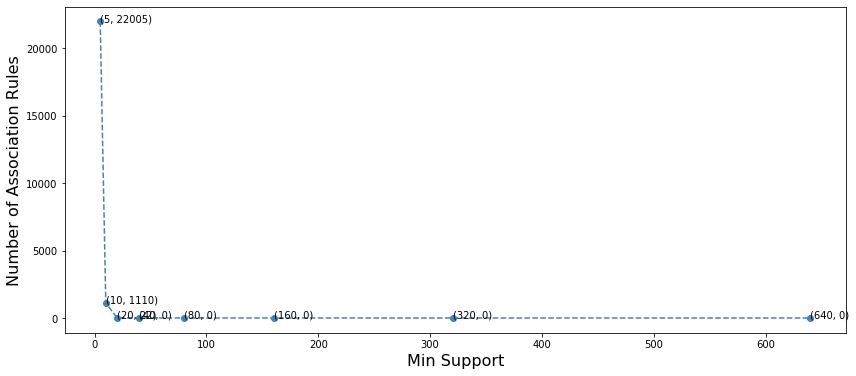

In [35]:
#Plot number of association rules with respect to MIN_SUP 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(min_sup_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Support", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(min_sup_array[i], num_association_rules_array[i],'({}, {})'.format(min_sup_array[i], num_association_rules_array[i]))
plt.show()

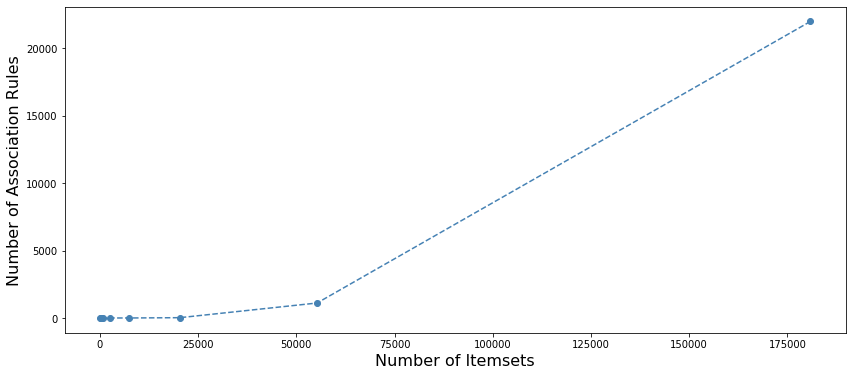

In [36]:
#Plot number of association rules with respect to number of itemsets

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(num_itemsets_array, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Number of Itemsets", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(num_itemsets_array[i], num_association_rules_array[i],'({}, {})'.format(num_itemsets_array[i], num_association_rules_array[i]))
plt.show()

In [37]:
#Run FP and generate association rules for various different values of MIN_CONF

MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
MIN_SUP = 20
#min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
time_taken_array = []
num_association_rules_array = []
for i in range(len(MIN_CONF_ARRAY)):
    patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
    start = timeit.default_timer()
    rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
    stop = timeit.default_timer()
    num_association_rules_array.append(len(rules))
    time_taken_array.append(stop-start)

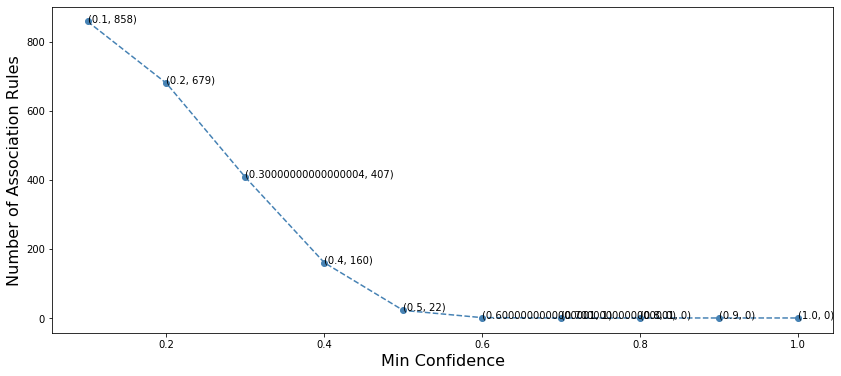

In [38]:
#Plot number of association rules with respect to Confidence Values 

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, num_association_rules_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
for i in range(0,len(num_association_rules_array)):
    plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

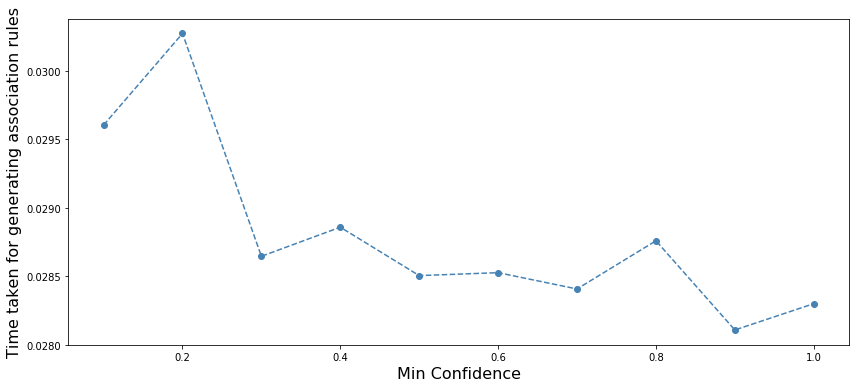

In [39]:
#Plot time taken to generate association rules with respect to MIN_CONF

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))
ax.plot(MIN_CONF_ARRAY, time_taken_array, color="steelblue",linestyle='--', marker='o')
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(time_taken_array)):
#     plt.text(MIN_CONF_ARRAY[i], time_taken_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], time_taken_array[i]))
plt.show()

In [40]:
#Run FP and generate association rules for various different values of MIN_CONF

MAX_NUM = 8
MIN_CONF_ARRAY = [0.1*i for i in range(1,11)]
min_sup_array = [10*(2**i) for i in range(0,MAX_NUM)]
#min_sup_array = [10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]
OVERALL_time_taken_array = []
OVERALL_num_association_rules_array = []
for i in range(len(min_sup_array)):
    MIN_SUP = min_sup_array[i]
    time_taken_array = []
    print("Calculating for MIN_SUP = " + str(MIN_SUP))
    num_association_rules_array = []
    for i in range(len(MIN_CONF_ARRAY)):
        patterns = pyfpgrowth.find_frequent_patterns(uid_songid_transaction_data, MIN_SUP)
        start = timeit.default_timer()
        rules = pyfpgrowth.generate_association_rules(patterns, MIN_CONF_ARRAY[i])
        stop = timeit.default_timer()
        num_association_rules_array.append(len(rules))
        time_taken_array.append(stop-start)
        
    OVERALL_time_taken_array.append(time_taken_array)
    OVERALL_num_association_rules_array.append(num_association_rules_array)

Calculating for MIN_SUP = 10
Calculating for MIN_SUP = 20
Calculating for MIN_SUP = 40
Calculating for MIN_SUP = 80
Calculating for MIN_SUP = 160
Calculating for MIN_SUP = 320
Calculating for MIN_SUP = 640
Calculating for MIN_SUP = 1280


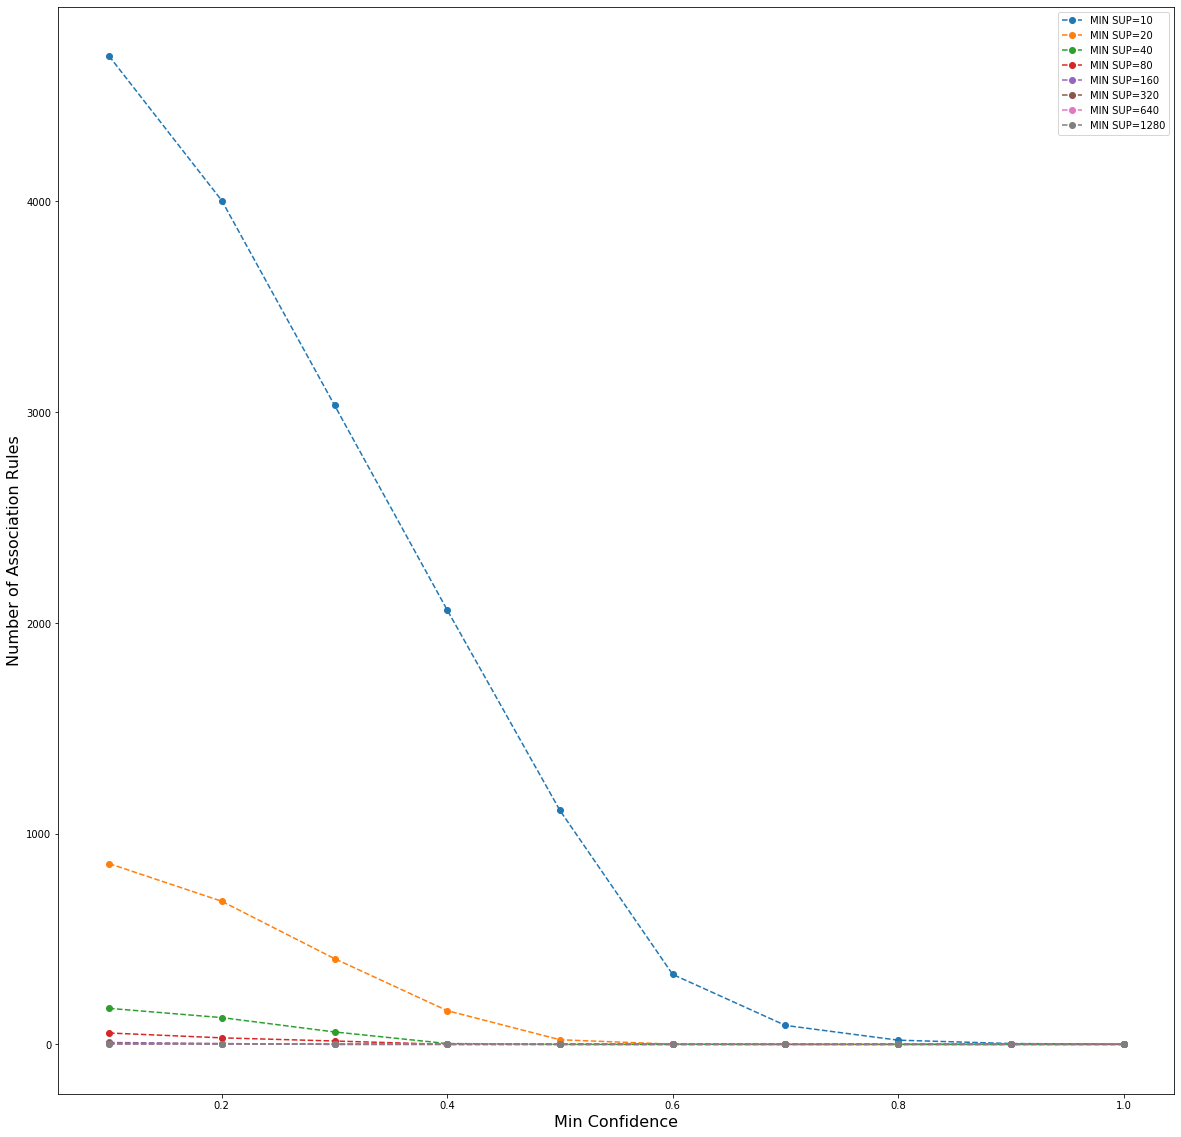

In [41]:
#Plot number of association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

for i in range(0,len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_num_association_rules_array[i], linestyle='--', marker='o',label="MIN SUP=" + str(min_sup_array[i]))
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Number of Association Rules", fontsize=16)
ax.legend()
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()

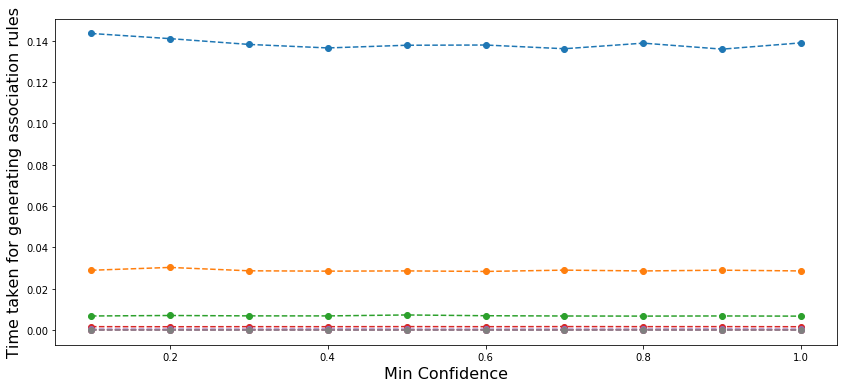

In [42]:
#Plot time taken to generate association rules with respect to Confidence Values for different support values

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,6))

for i in range(len(min_sup_array)):
    ax.plot(MIN_CONF_ARRAY, OVERALL_time_taken_array[i],linestyle='--', marker='o')
    
ax.set_xlabel("Min Confidence", fontsize=16)
ax.set_ylabel("Time taken for generating association rules", fontsize=16)
# for i in range(0,len(num_association_rules_array)):
#     plt.text(MIN_CONF_ARRAY[i], num_association_rules_array[i],'({}, {})'.format(MIN_CONF_ARRAY[i], num_association_rules_array[i]))
plt.show()